#### 학습 목표
- 머신 러닝의 분류 모델을 이용해, 여러 가지 평가 지표를 적용
- 의학(당뇨병 여부 판단) 관련 데이터이므로, 재현율이 중요

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, Binarizer
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import missingno as ns

import warnings
warnings.filterwarnings('ignore')

In [12]:
diabetes_df = pd.read_csv('./data/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
# target 분포 확인
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [24]:
# 분류를 위한 예측모델 생성
dtc = DecisionTreeClassifier()
lr = LogisticRegression()
rfc = RandomForestClassifier()

features = diabetes_df.iloc[:, 0:-1]
labels = diabetes_df.iloc[:, -1]

# 모델 selection - 학습과 예측 및 평가
def evaluation(model, features, labels):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=10)
    model.fit(X_train, y_train)
    
    pred = model.predict(X_test)
    
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    
    print(confusion)
    print('정확도 : {}, 정밀도 : {}, 재현율 : {}'.format(accuracy, precision,  recall))

    
evaluation(dtc, features, labels)
evaluation(lr, features, labels)
evaluation(rfc, features, labels)


[[80 15]
 [26 33]]
정확도 : 0.7337662337662337, 정밀도 : 0.6875, 재현율 : 0.559322033898305

[[88  7]
 [29 30]]
정확도 : 0.7662337662337663, 정밀도 : 0.8108108108108109, 재현율 : 0.5084745762711864

[[85 10]
 [31 28]]
정확도 : 0.7337662337662337, 정밀도 : 0.7368421052631579, 재현율 : 0.4745762711864407


In [29]:
# 교차 검증, 학습, 예측
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold
from sklearn.metrics import make_scorer

kfold = KFold(n_splits=20, random_state=1, shuffle=True)
sfold = StratifiedKFold(n_splits=20, random_state=1)

def eval(model, feature, label, fold):
    scoring = {
    'accuracy': make_scorer(accuracy_score),'precision' :make_scorer(precision_score), 
    'recall' : make_scorer(recall_score), 'f1_score': make_scorer(f1_score)}
    
    result = cross_validate(model, feature, label, cv=fold, scoring=scoring)
    
    print('accuracy', result['test_accuracy'].mean())
    print('precision', result['test_precision'].mean())
    print('recall', result['test_recall'].mean())
    print('f1', result['test_f1_score'].mean())

print("KFold")
print('\nDeicisionTreeClassifier: ')
eval(dtc, features, labels, kfold)
print('\nlinear Regression: ')
eval(lr, features, labels, kfold)
print('\nRandomForestClassifier: ')
eval(rfc, features, labels, kfold)

print('*'*20)
print("StratifiedKFold")
print('\nDeicisionTreeClassifier: ')
eval(dtc, features, labels, sfold)
print('\nlinear Regression: ')
eval(lr, features, labels, sfold)
print('\nRandomForestClassifier: ')
eval(rfc, features, labels, sfold)

KFold

DeicisionTreeClassifier: 
accuracy 0.709952766531714
precision 0.5850508508519344
recall 0.6006771006771007
f1 0.5833966505979551

linear Regression: 
accuracy 0.7761470985155194
precision 0.7245171495171495
recall 0.5607698551448551
f1 0.6244347486596362

RandomForestClassifier: 
accuracy 0.7798582995951417
precision 0.7174908016819781
recall 0.5979177766677767
f1 0.6455860798555807
********************
StratifiedKFold

DeicisionTreeClassifier: 
accuracy 0.716464237516869
precision 0.5976063152533742
recall 0.593131868131868
f1 0.5909353021335841

linear Regression: 
accuracy 0.7657557354925777
precision 0.720669191919192
recall 0.5631868131868132
f1 0.625414924073095

RandomForestClassifier: 
accuracy 0.7595479082321187
precision 0.690187288201994
recall 0.5898351648351648
f1 0.6295924430486142


No handles with labels found to put in legend.


임계값 0.5

DeicisionTreeClassifier: 
accuracy 0.7207792207792207
precision 0.6538461538461539
recall 0.576271186440678


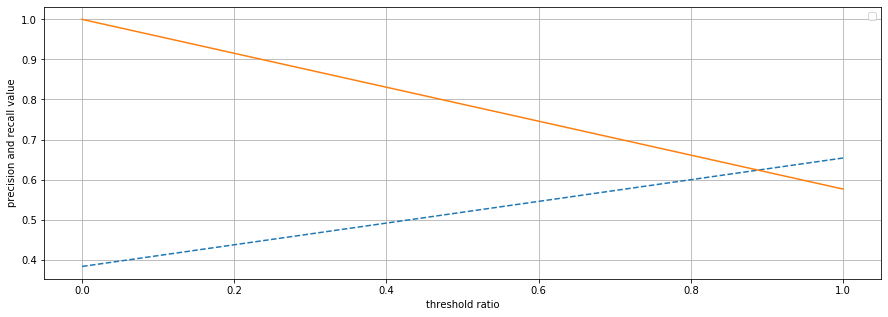

No handles with labels found to put in legend.



linear Regression: 
accuracy 0.7662337662337663
precision 0.8108108108108109
recall 0.5084745762711864


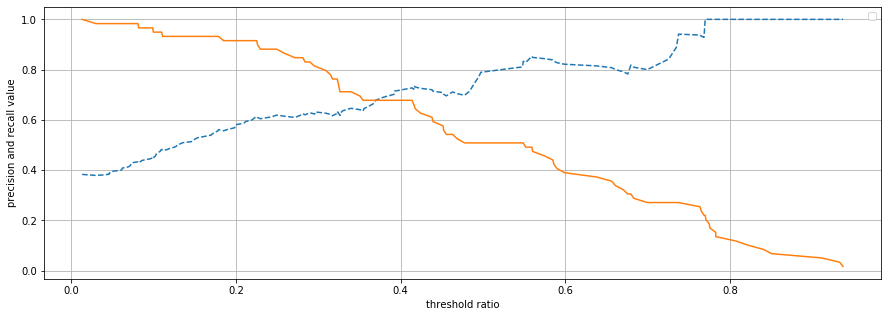


RandomForestClassifier: 


No handles with labels found to put in legend.


accuracy 0.7402597402597403
precision 0.7714285714285715
recall 0.4576271186440678


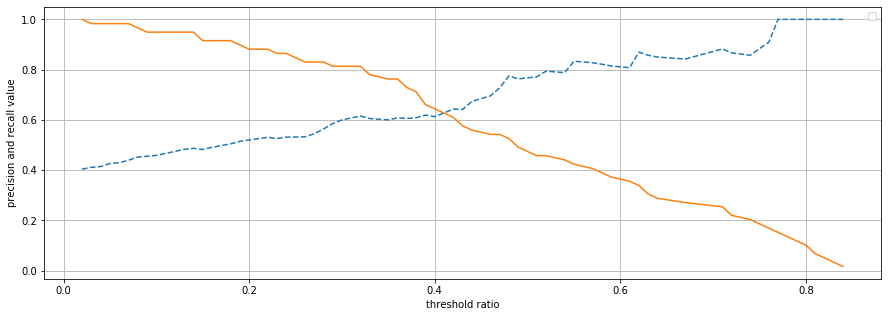


임계값 0.2

DeicisionTreeClassifier: 
accuracy 0.7012987012987013
precision 0.6181818181818182
recall 0.576271186440678


No handles with labels found to put in legend.


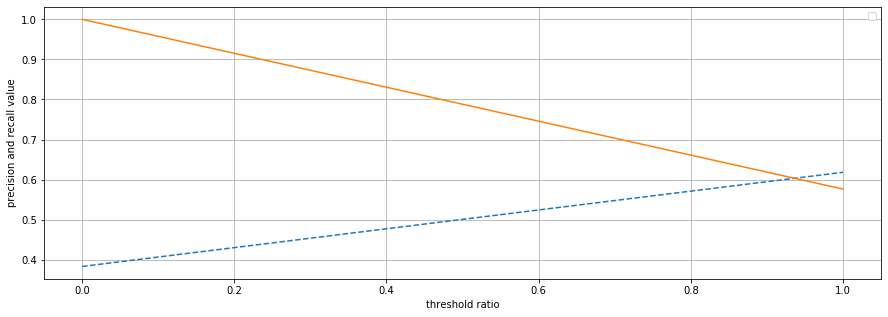

No handles with labels found to put in legend.



linear Regression: 
accuracy 0.7207792207792207
precision 0.5869565217391305
recall 0.9152542372881356


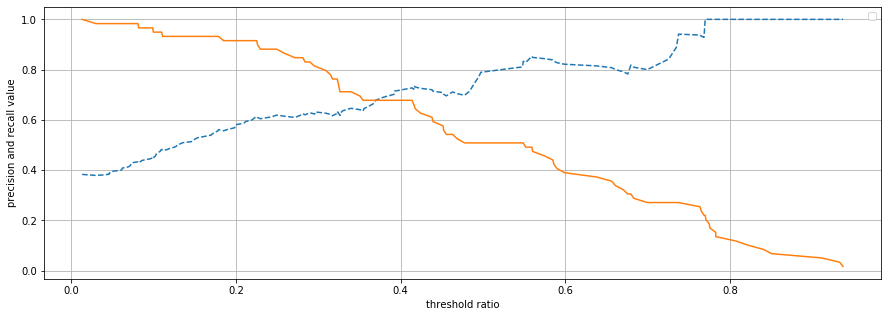


RandomForestClassifier: 


No handles with labels found to put in legend.


accuracy 0.6688311688311688
precision 0.5416666666666666
recall 0.8813559322033898


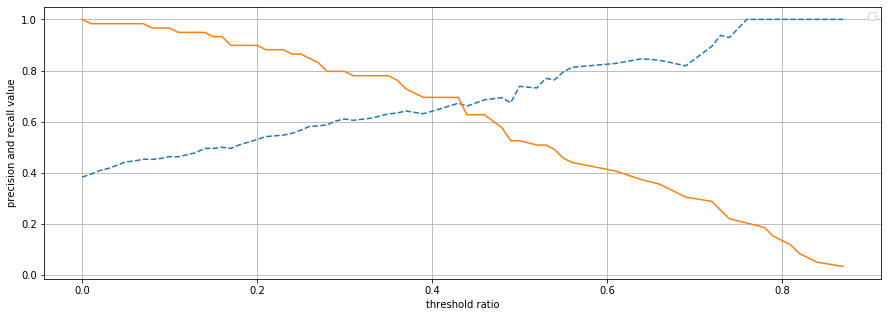

In [40]:
# 임계값별 정밀도/ 재현율 확인 및 시각화

def threshold_differ(model, user_threshold):
    X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=.2, random_state=10)
    
    model.fit(X_train, y_train)
    pred_pro_result = model.predict_proba(X_test)
    y_pred = model.predict(X_test)
    
    positive_pred_proba = pred_pro_result[:,1].reshape(-1,1)
    user_predict = Binarizer(threshold=user_threshold).fit(positive_pred_proba).transform(positive_pred_proba)
    
    confusion = confusion_matrix(y_test, user_predict)
    accuracy = accuracy_score(y_test, user_predict)
    precision = precision_score(y_test, user_predict)
    recall = recall_score(y_test, user_predict)
    print('accuracy' , accuracy)
    print('precision' , precision)
    print('recall' , recall)
    
    pre_positive_label = model.predict_proba(X_test)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, pre_positive_label)
    plt.figure(figsize=(15,5))
    plt.xlabel('threshold ratio')
    plt.ylabel('precision and recall value')

    plt.plot(thresholds, precisions[0:thresholds.shape[0]], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:thresholds.shape[0]], label='recall')

    plt.grid()
    plt.show()

    
print('임계값 0.5')
print('\nDeicisionTreeClassifier: ')
threshold_differ(dtc,0.5)
print('\nlinear Regression: ')
threshold_differ(lr,0.5)
print('\nRandomForestClassifier: ')
threshold_differ(rfc,0.5)

print('\n임계값 0.2')
print('\nDeicisionTreeClassifier: ')
threshold_differ(dtc,0.2)
print('\nlinear Regression: ')
threshold_differ(lr,0.2)
print('\nRandomForestClassifier: ')
threshold_differ(rfc,0.2)


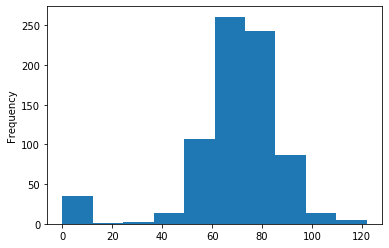

In [45]:
# 당수치, 혈압, 피하지방, 인슐린, 체질량 지수의 분포를 히스토그램으로 확인
diabetes_df['BloodPressure'].plot.hist()

# 표준화, 정규화


In [42]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')